In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def plot(S,I,R):
  fix, ax = plt.subplots(figsize=(8,6))
  ax.plot(np.arange(0, len(S)), S, 'g', marker = 'o', label='subsceptible')
  ax.plot(np.arange(0, len(I)), I, 'r', marker = '^', label='infected')
  ax.plot(np.arange(0, len(R)), R, 'b', marker = '*', label='recovered')
  ax.set_ylabel("Number of people")
  ax.set_xlabel("time")
  ax.legend();

## Version 1

In [ ]:
def run_version_1(steps, N, beta, alpha):

  # initialize
  I = 1 #patient zero
  R = 0 #recovered
  S = N-I-R #susceptible

  # observe
  history = []

  # update
  for step in range(steps):
    #variables to update
    next_S = S
    next_I = I
    next_R = R

    next_S -= beta*S*I
    next_I += beta*S*I - alpha*I
    next_R += alpha*I

    #update variables
    S = next_S
    I = next_I
    R = next_R
    history.append((S,I,R))

  St,It,Rt = map(np.array, zip(*history))
  return(St,It,Rt)

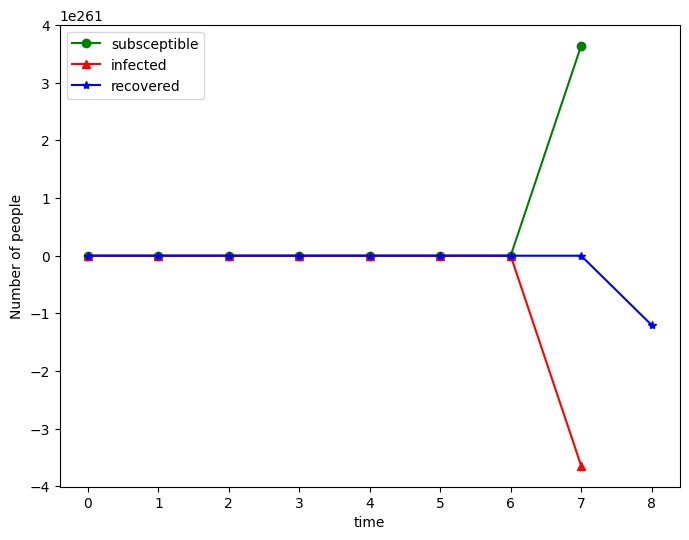

In [ ]:
# 5% probability infection; 33% recovery
(S,I,R) = run_version_1(100, 10_000, 0.05, 0.33)
plot(S,I,R)

What happened? Infecting 5% of people is a lot, even though it might seem fine.

## Version 2

In [ ]:
def run_version_2(steps, N, beta, alpha):
  """Math model"""
  # initialize
  I = 1 #patient zero
  R = 0 #recovered
  S = N-I-R #susceptible

  # observe
  history = []

  # update
  for step in range(steps):
    #variables to update
    next_S = S
    next_I = I
    next_R = R

    # WE GO BACK TO THE MATH VERSION
    next_S -= S*(1-(1-beta)**I)
    next_I += S*(1-(1-beta)**I) - alpha*I
    next_R += alpha*I

    #update variables
    S = next_S
    I = next_I
    R = next_R

    history.append((S,I,R))

  St,It,Rt = map(np.array, zip(*history))
  return(St,It,Rt)

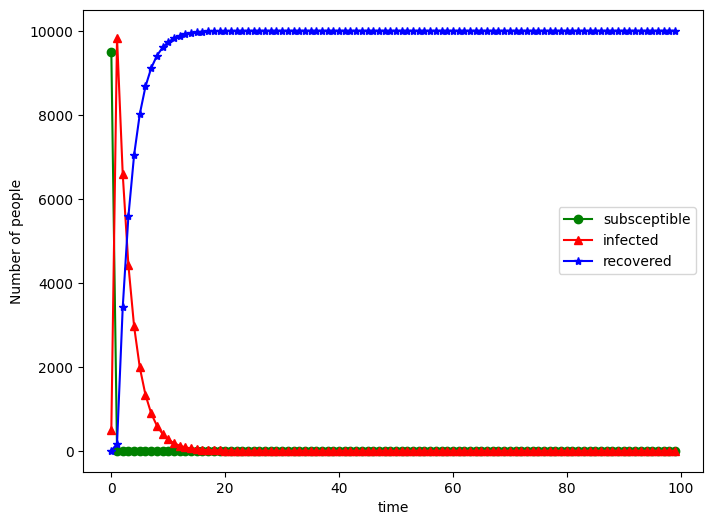

In [ ]:
# 5% probability infection; 33% recovery
(S,I,R) = run_version_2(100, 10_000, 0.05, 0.33)
plot(S,I,R)

Beta is small, but people get infected _fast_.

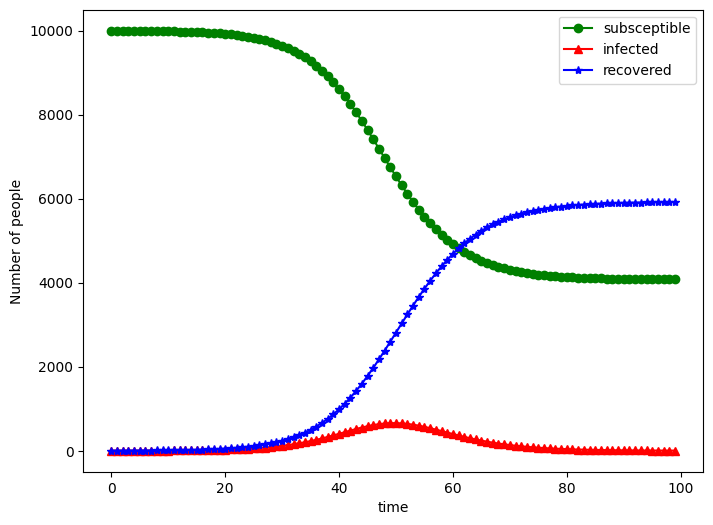

In [ ]:
# .0005% probability infection; 33% recovery
(S,I,R) = run_version_2(100, 10_000, 0.00005, 0.33)
plot(S,I,R)

## Version 3

In [ ]:
def run_version_3(steps, N, beta, alpha):
  """'Agent-based' computational approach"""
  # initialize
  I = 1 #patient zero
  R = 0 #recovered
  S = N-I-R #susceptible

  # observe
  history = []

  # update
  for step in range(steps):
    #variables to update
    next_S = S
    next_I = I
    next_R = R

    # simulate the change in a computational model
    # loop over possible infections
    for dummy_s in range(S):
     for dummy_i in range(I):
       if np.random.random(1)<beta:
         next_S -= 1
         next_I += 1
         break

    for dummy_i in range(I):
     if np.random.random(1)<alpha:
       next_I -= 1
       next_R += 1

    #update variables
    S = next_S
    I = next_I
    R = next_R

    history.append((S,I,R))

    if I==0:
        break;

  St,It,Rt = map(np.array, zip(*history))

  return(St,It,Rt)

In [ ]:
(S_c,I_c,R_c) = run_version_3(100, 10_000, 0.00005, 0.33)

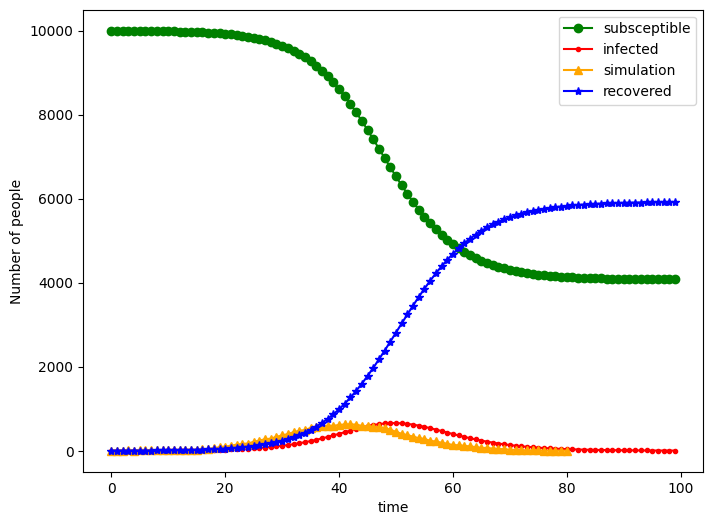

In [ ]:
fix, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(0, len(S)), S, 'g', marker = 'o', label='subsceptible')
ax.plot(np.arange(0, len(I)), I, 'r', marker = '.', label='infected')
ax.plot(np.arange(0, len(I_c)), I_c, 'orange', marker = '^', label='simulation')
ax.plot(np.arange(0, len(R)), R, 'b', marker = '*', label='recovered')
ax.set_ylabel("Number of people")
ax.set_xlabel("time")
ax.legend();

## Version 4

In [101]:
?np.random.binomial

In [102]:
np.random.binomial(100,0.2)

18

In [ ]:
def run_version_4(steps, N, beta, alpha):
  """better computational simulation"""
  # initialize
  I = 1 #patient zero
  R = 0 #recovered
  S = N-I-R #susceptible

  # observe
  history = []

  # update
  for step in range(steps):
    #variables to update
    next_S = S
    next_I = I
    next_R = R

    # Getting rid of nested for loops
    p_inf = 1-(1-beta)**I
    # see ?np.random.binomial. Bernoulli trials.
    # see also CDF in clip 4 on Poisson process.
    # 'You throw a chalk in between 0 and S, with
    new_I = np.random.binomial(S,p_inf)
    new_R = np.random.binomial(I,alpha)
    next_S -= new_I
    next_I += new_I - new_R
    next_R += new_R

    #update variables
    S = next_S
    I = next_I
    R = next_R

    history.append((S,I,R))
    if I==0:
      break;

  St,It,Rt = map(np.array, zip(*history))
  return(St,It,Rt)

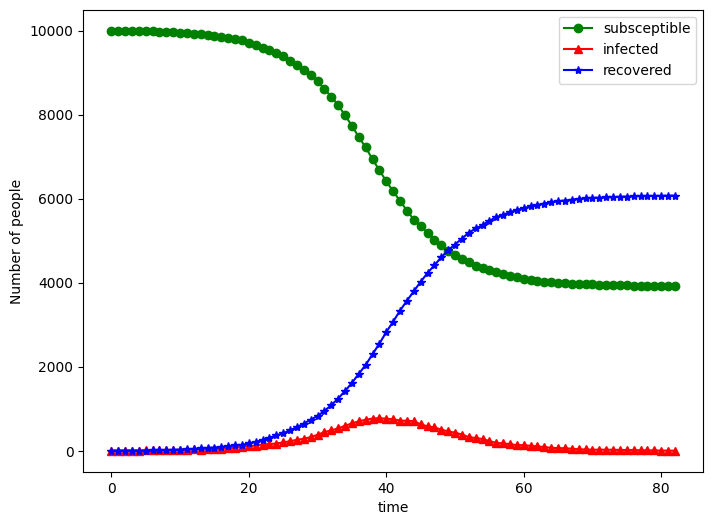

In [ ]:
(S,I,R) = run_version_4(100, 10_000, 0.00005, 0.33)
plot(S,I,R)